In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt

In [4]:
X = np.load('../input/ptbxl-atrial-fibrillation-detection/ecgeq-500hzsrfava.npy')
Y = pd.read_csv('../input/ptbxl-atrial-fibrillation-detection/coorteeqsrafva.csv',sep=';')

In [5]:
display(Y)

Unnamed: 0 diagnosi  ecg_id ritmi  patient_id   age  sex  height  \
0              0    STACH   10900    VA     15654.0  54.0    0     NaN   
1              1     AFLT   10900    AF     15654.0  54.0    0     NaN   
2              2       SR    8209    SR     12281.0  55.0    0     NaN   
3              3    STACH   17620    VA      2007.0  29.0    1   164.0   
4              4    SBRAD   12967    VA      8685.0  57.0    0     NaN   
...          ...      ...     ...   ...         ...   ...  ...     ...   
6423        6423    SARRH    4131    VA      3829.0  81.0    0   178.0   
6424        6424    STACH   18644    VA      3866.0  88.0    0   152.0   
6425        6425       SR    3693    SR     17345.0  83.0    1     NaN   
6426        6426     AFIB    1039    AF      6038.0  75.0    1   177.0   
6427        6427       SR   15097    SR     14746.0  27.0    0     NaN   

      weight  nurse  ...  validated_by_human baseline_drift static_noise  \
0        NaN    0.0  ...               False            NaN          NaN   
1        NaN    0.0  ...               False            NaN          NaN   
2        NaN    1.0  ...                True            NaN          NaN   
3       56.0    7.0  ...                True            NaN          NaN   
4        NaN    0.0  ...               False            NaN   , I-AVR,     
...      ...    ...  ...                 ...            ...          ...   
6423    70.0   11.0  ...                True            NaN          NaN   
6424    45.0   11.0  ...                True          v3,            NaN   
6425     NaN    1.0  ...                True            NaN   , I-AVR,     
6426    80.0    NaN  ...                True            NaN          NaN   
6427     NaN    1.0  ...                True            NaN          NaN   

     burst_noise electrodes_problems extra_beats pacemaker strat_fold  \
0            NaN                 NaN         NaN       NaN          6   
1            NaN                 NaN         NaN       NaN          6   
2            NaN                 NaN         NaN       NaN         10   
3            NaN                 NaN         NaN       NaN          1   
4            NaN                 NaN         NaN       NaN          1   
...          ...                 ...         ...       ...        ...   
6423         NaN                 NaN         NaN       NaN          4   
6424         NaN                 NaN         2ES       NaN         10   
6425         NaN                 NaN         NaN       NaN          5   
6426         NaN                 NaN         2ES       NaN          7   
6427         NaN                 NaN         NaN       NaN          8   

                    filename_lr                filename_hr  
0     records100/10000/10900_lr  records500/10000/10900_hr  
1     records100/10000/10900_lr  records500/10000/10900_hr  
2     records100/08000/08209_lr  records500/08000/08209_hr  
3     records100/17000/17620_lr  records500/17000/17620_hr  
4     records100/12000/12967_lr  records500/12000/12967_hr  
...                         ...                        ...  
6423  records100/04000/04131_lr  records500/04000/04131_hr  
6424  records100/18000/18644_lr  records500/18000/18644_hr  
6425  records100/03000/03693_lr  records500/03000/03693_hr  
6426  records100/01000/01039_lr  records500/01000/01039_hr  
6427  records100/15000/15097_lr  records500/15000/15097_hr  

[6428 rows x 31 columns]

In [6]:
import random
normalCase = random.choice(list(Y[Y['ritmi']=='SR'].index))

Text(0.5, 0.98, 'SR')

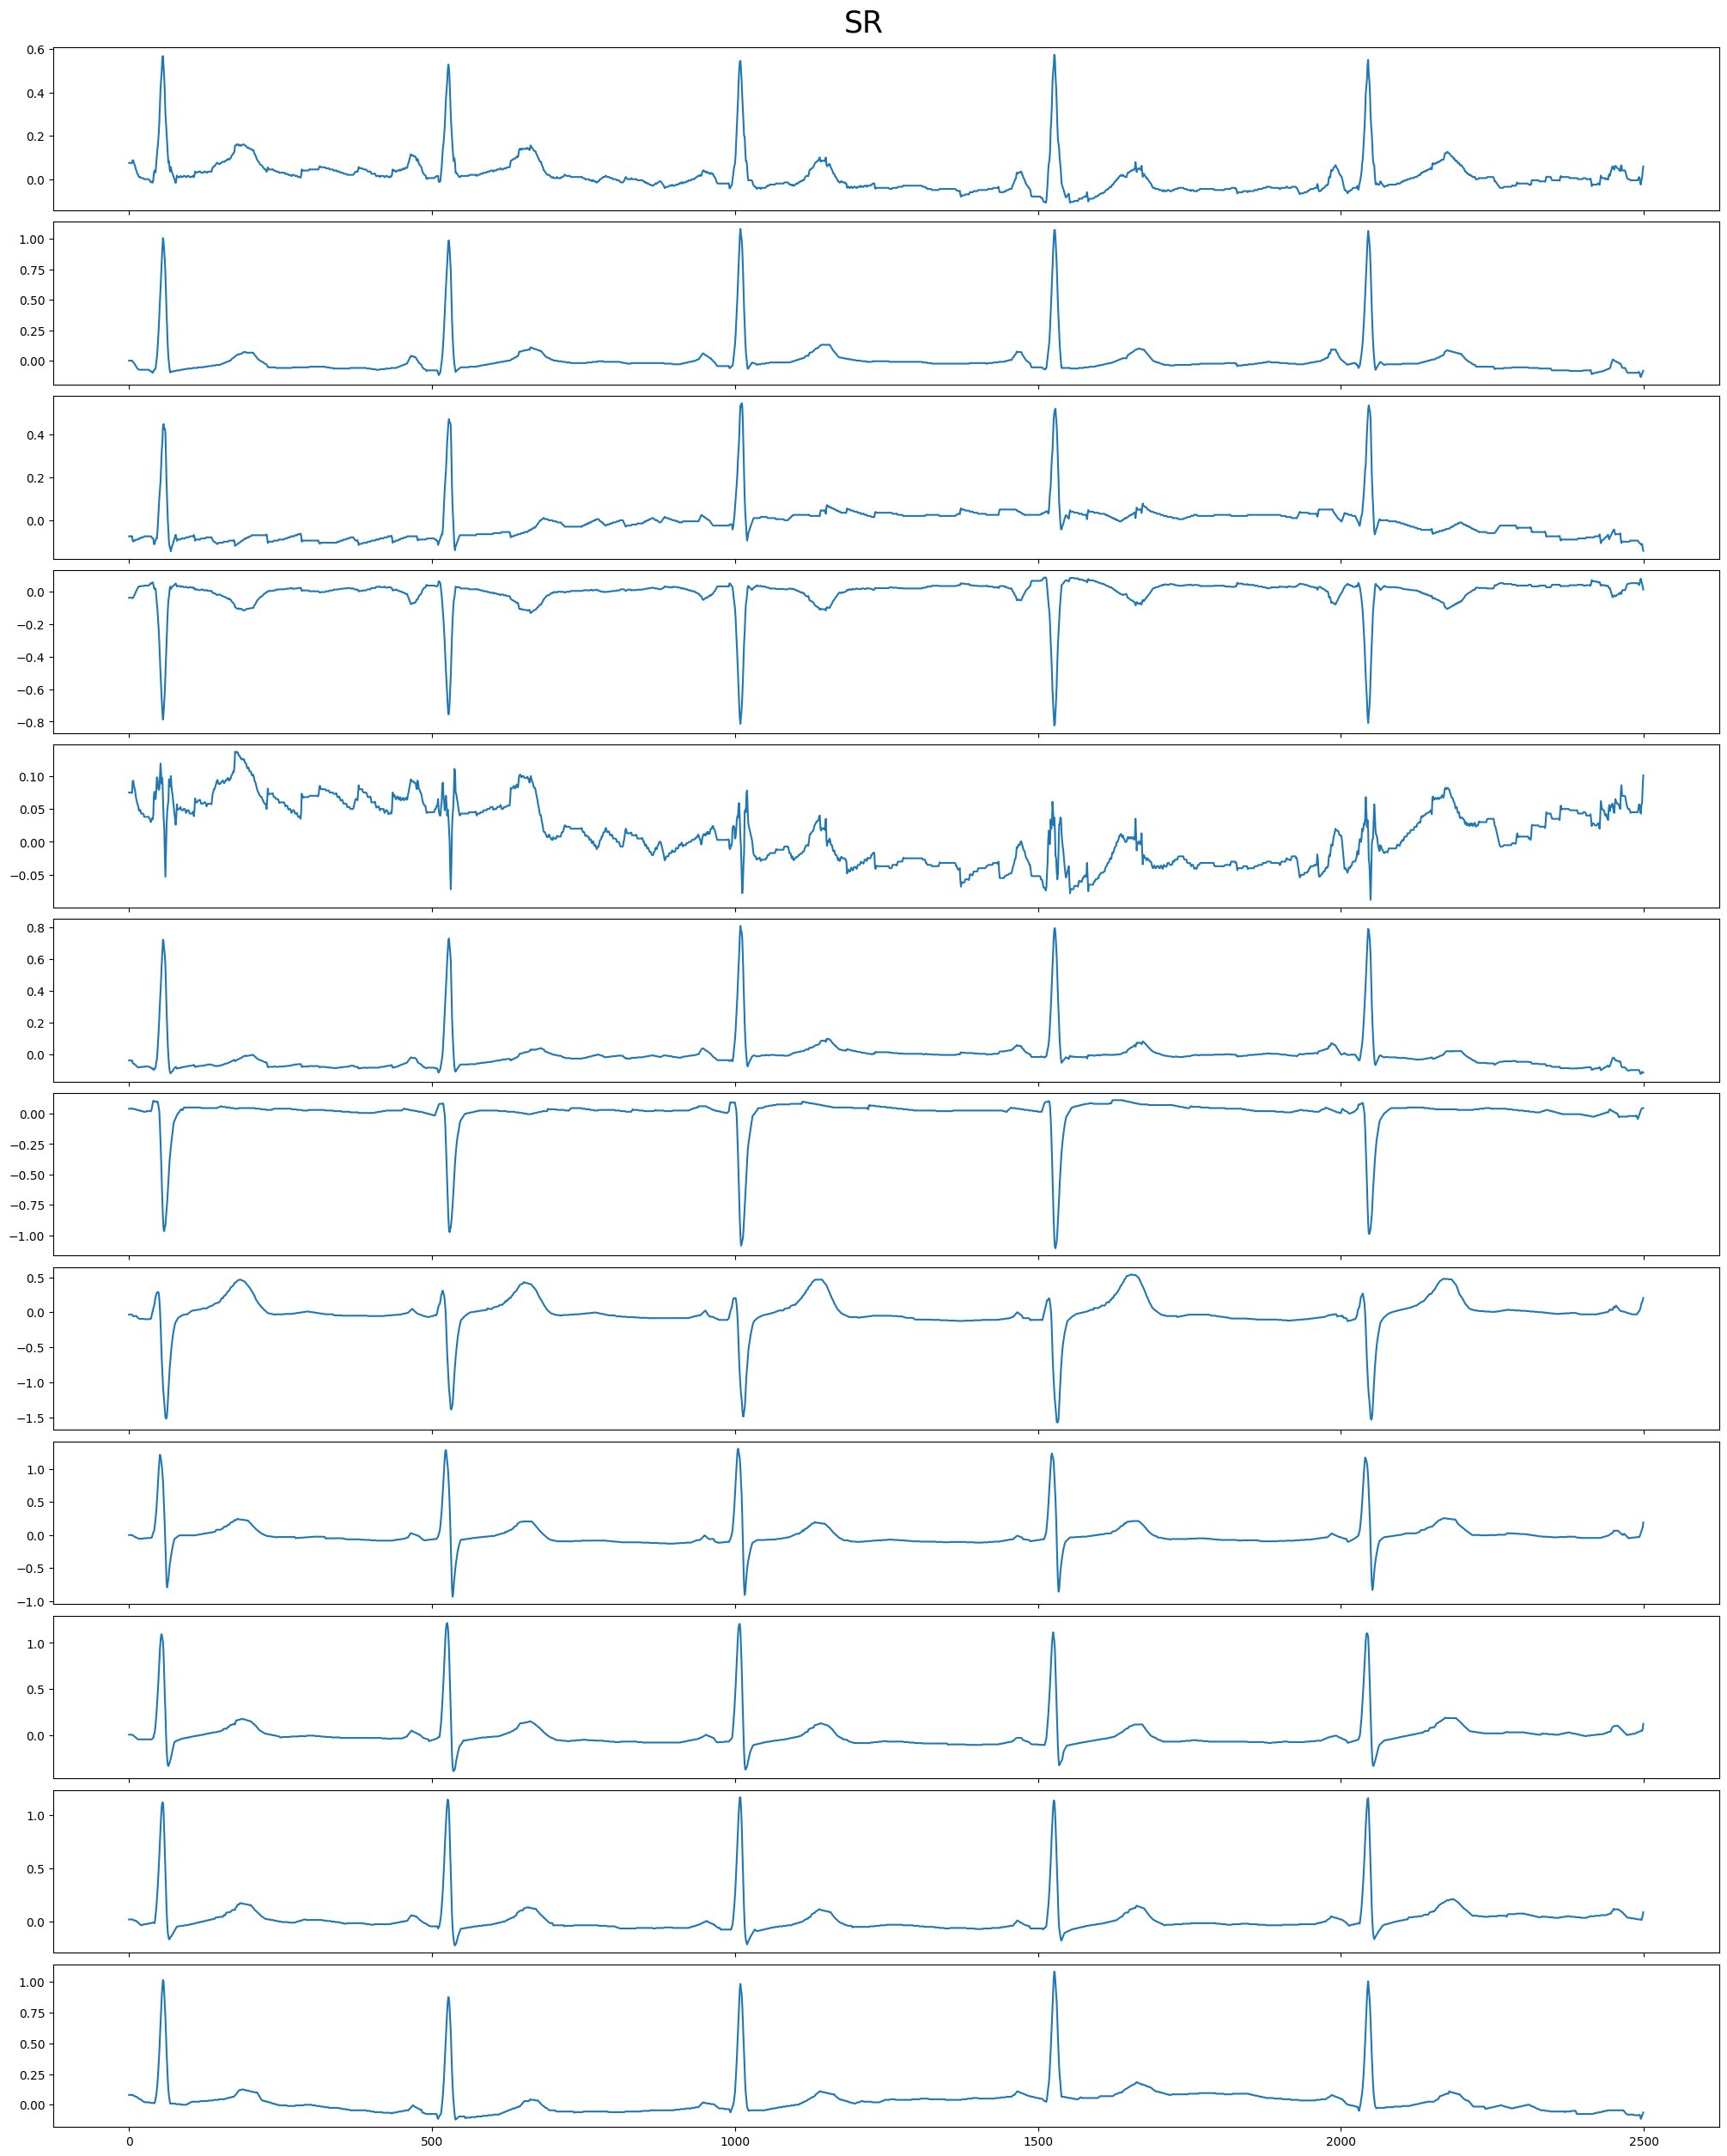

In [7]:
fig,ax = plt.subplots(12,1, figsize=(20,25), sharex=True, sharey=False, constrained_layout=True)
for i in range(12):
    ax[i].plot(X[normalCase,:2500,i])
fig.suptitle('SR', fontsize=25)

In [8]:
FibrillationCase = random.choice(list(Y[Y['ritmi']=='AF'].index))

Text(0.5, 0.98, 'AF')

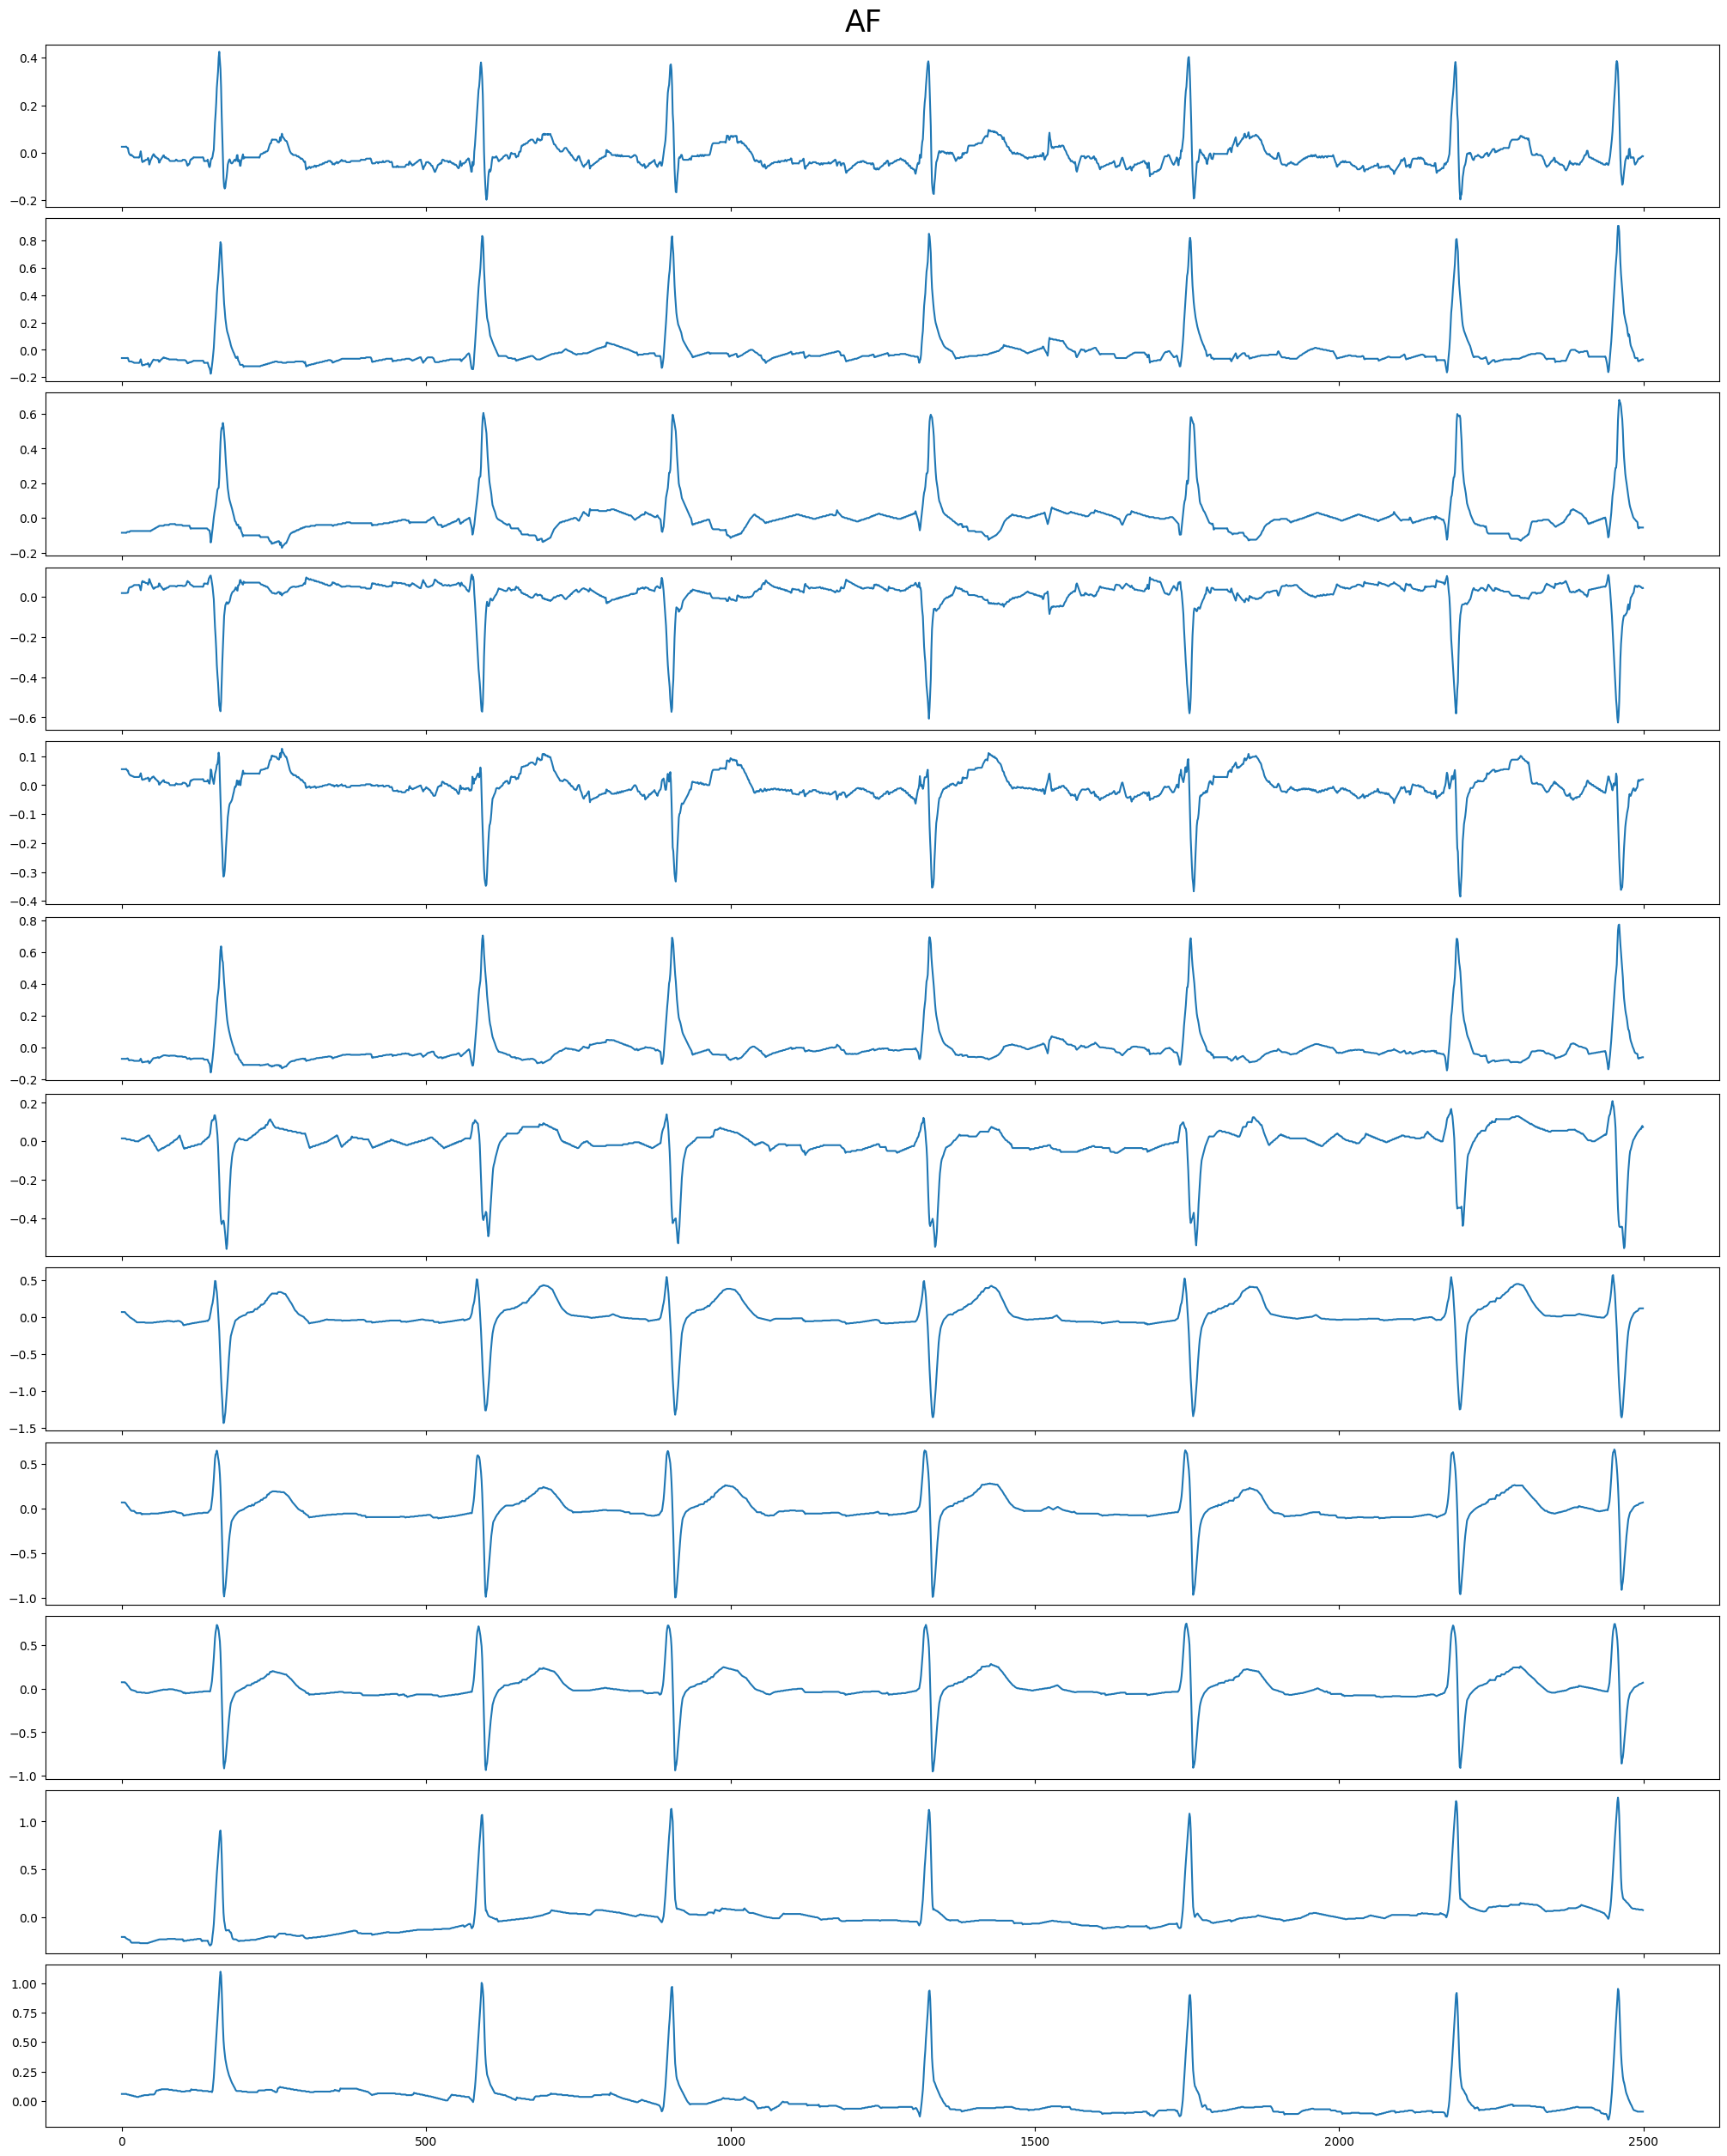

In [9]:
fig,ax = plt.subplots(12,1, figsize=(20,25), sharex=True, sharey=False,constrained_layout=True)
for i in range(12):
    ax[i].plot(X[FibrillationCase, :2500, i])
fig.suptitle('AF', fontsize=25)

In [10]:
ArrhythmiaCase = random.choice(list(Y[Y['ritmi'] == 'VA'].index))

Text(0.5, 0.98, 'VA')

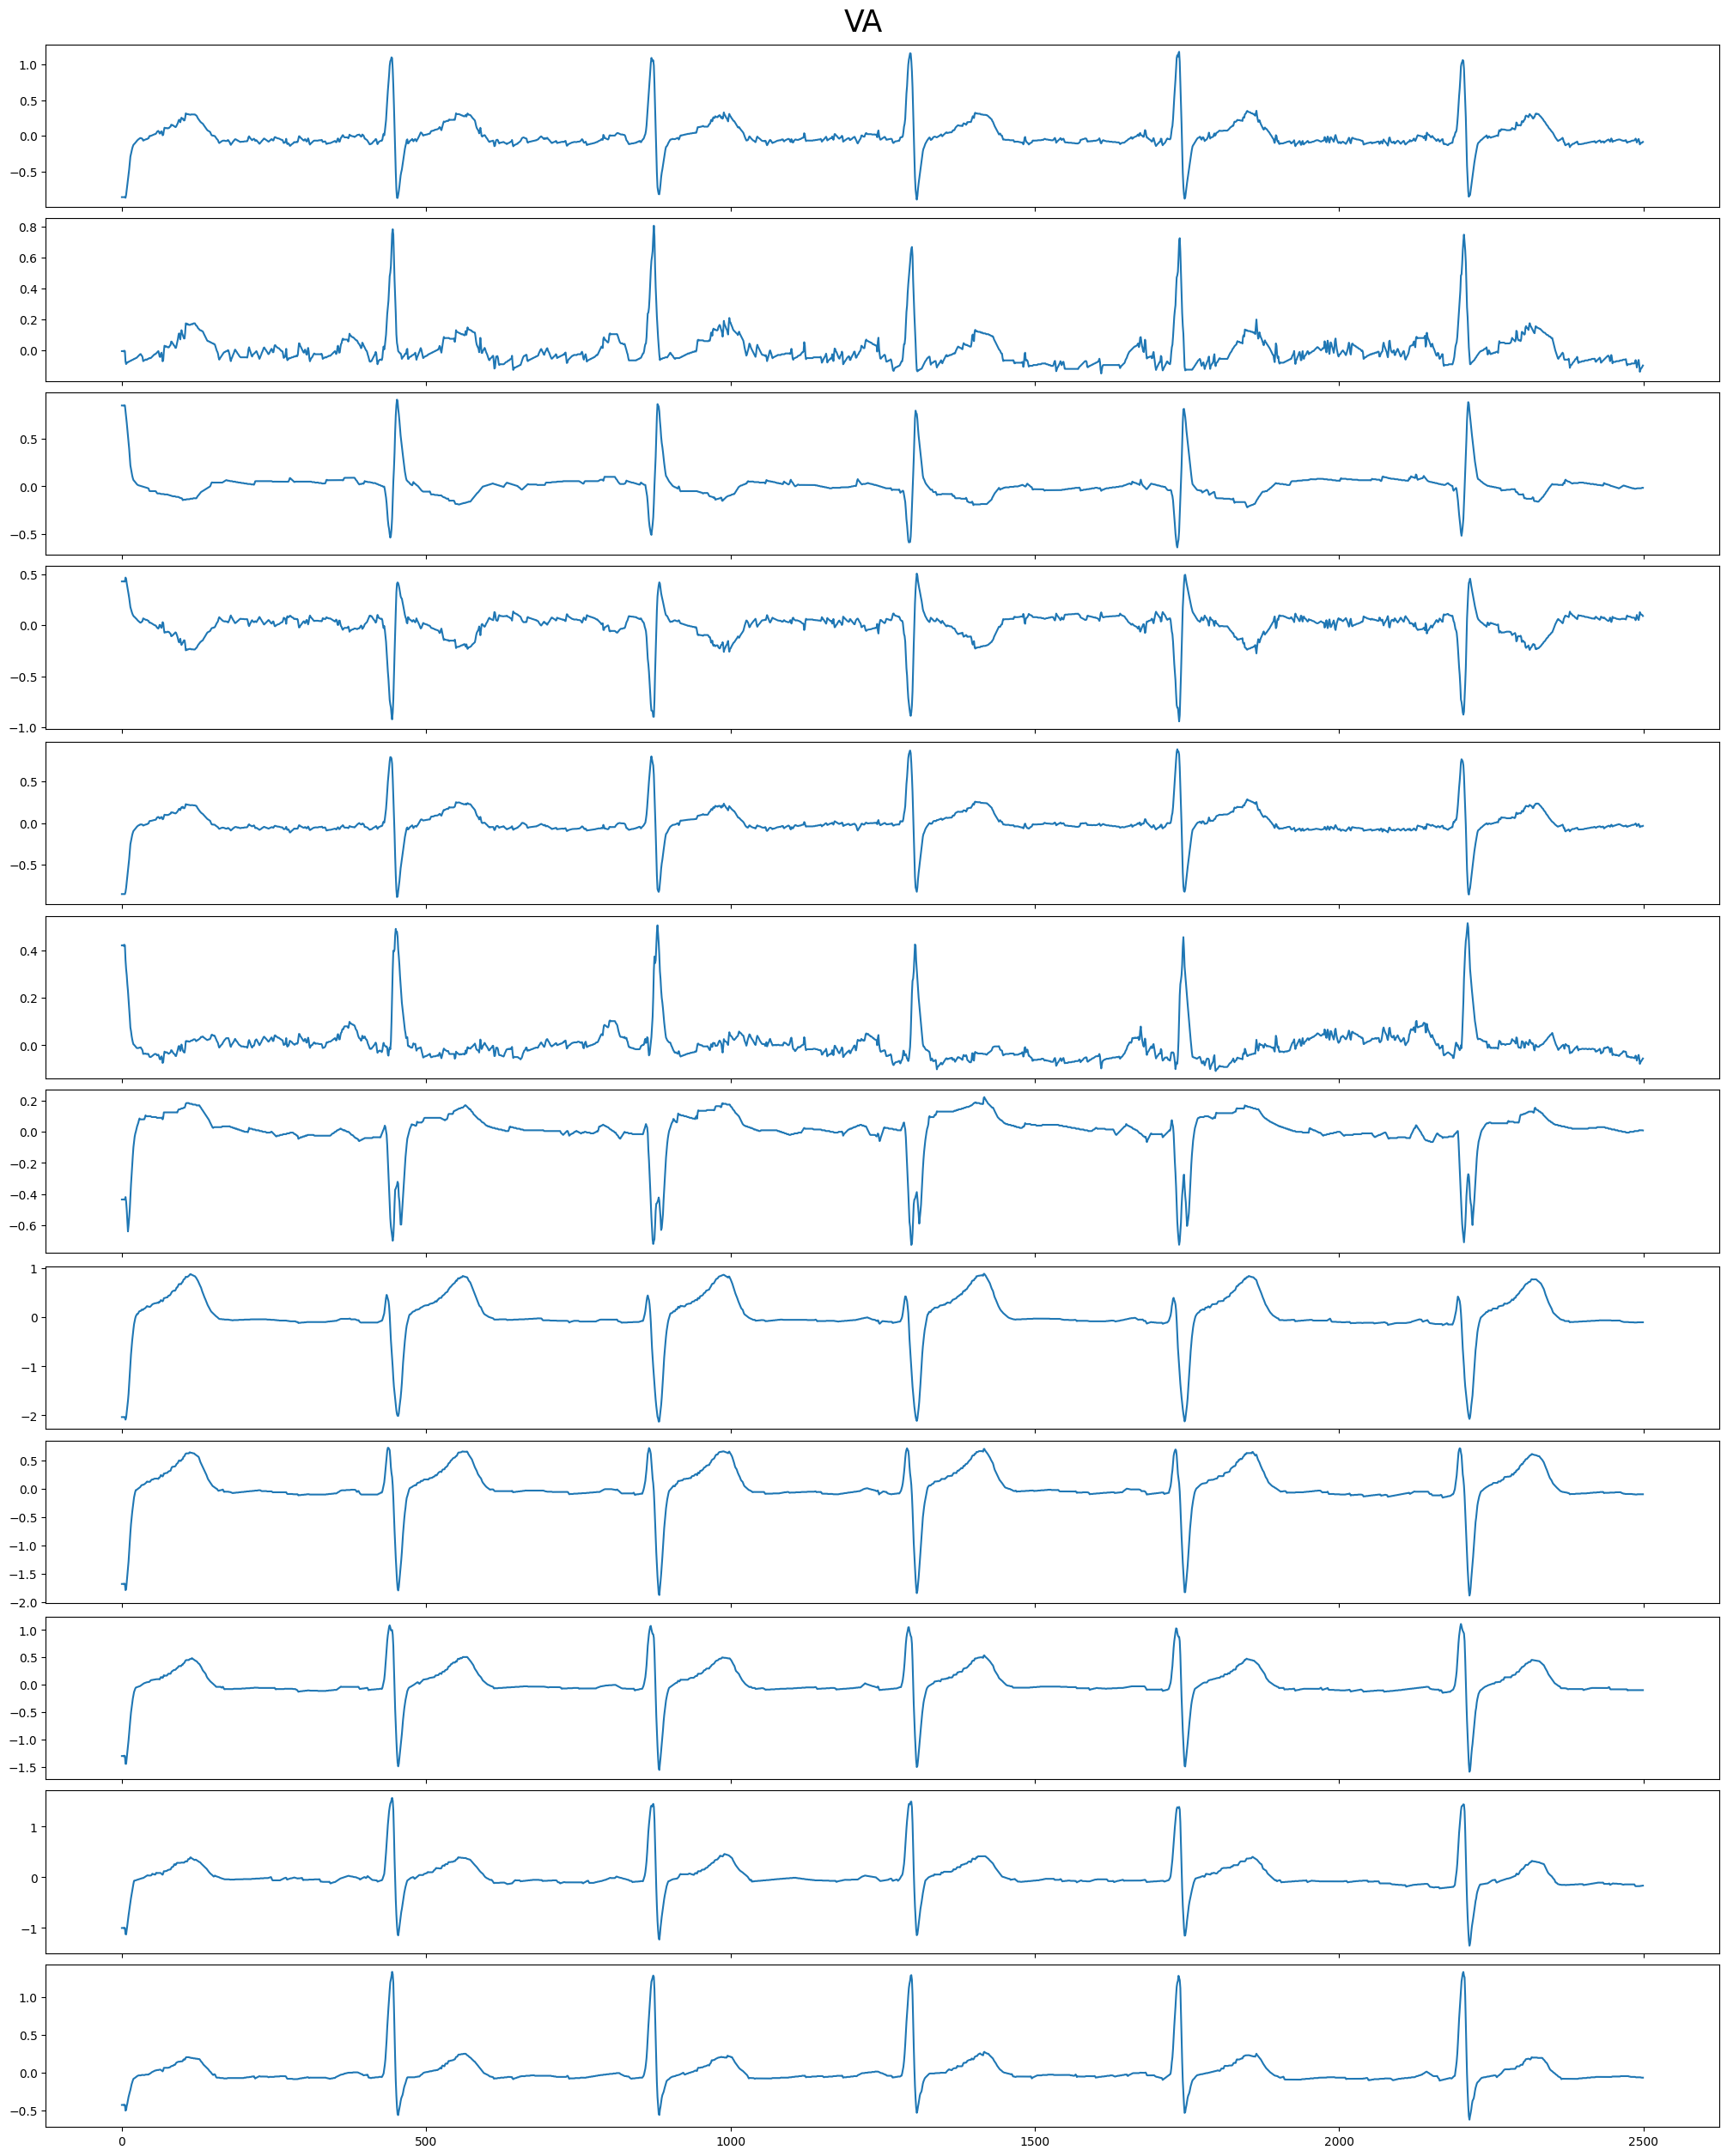

In [11]:
fig,ax = plt.subplots(12,1, figsize=(20,25), sharex=True, sharey=False,constrained_layout=True)
for i in range(12):
    ax[i].plot(X[ArrhythmiaCase, :2500, i])
fig.suptitle('VA', fontsize=25)

In [12]:
from collections import Counter

In [13]:
Counter(Y['ritmi']) 

Counter({'VA': 2841, 'AF': 1587, 'SR': 2000})

In [14]:
print(Y.shape)
print(X.shape)

(6428, 31)
(6428, 5000, 12)


In [15]:
ArrhythmiaCase1 = random.choice(list(Y[Y['ritmi'] == 'VA'].index))

Text(0.5, 0.98, 'VA')

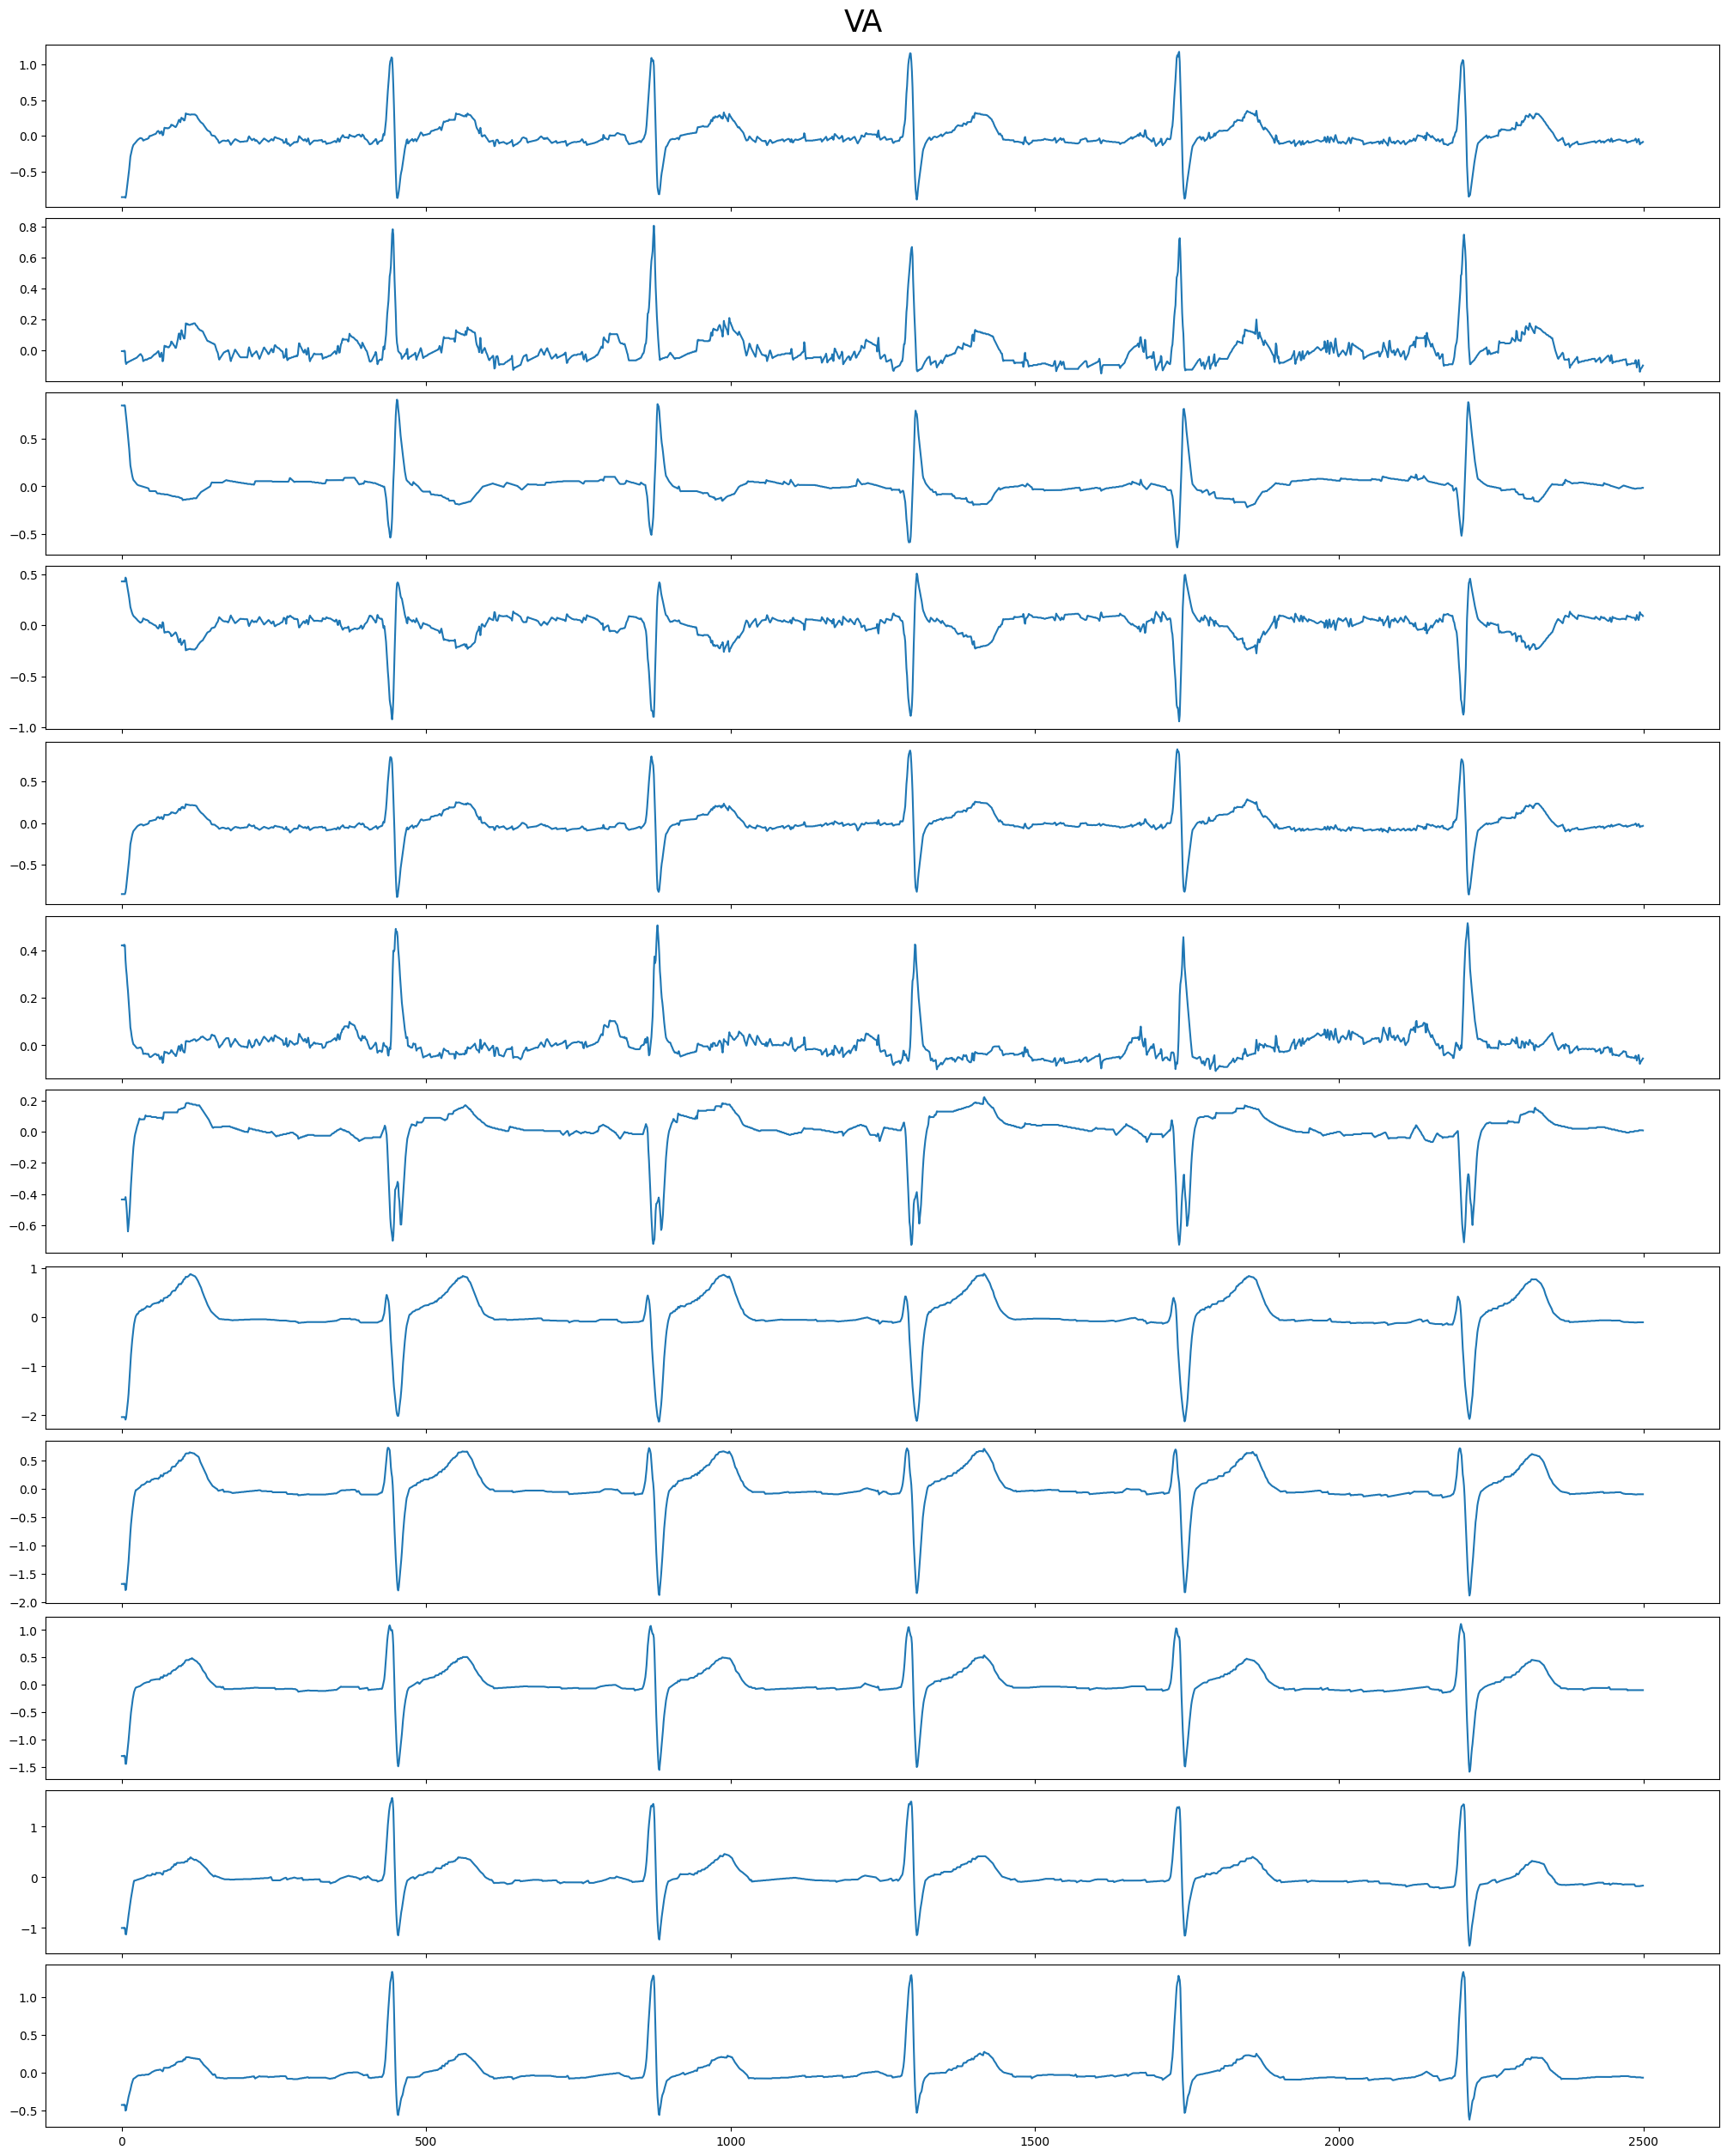

In [16]:
fig,ax = plt.subplots(12,1, figsize=(20,25), sharex=True, sharey=False, constrained_layout=True)
for i in range(12):
    ax[i].plot(X[ArrhythmiaCase, :2500, i])
fig.suptitle('VA', fontsize=25)

In [17]:
print(X[FibrillationCase, :25, 0])
print(X[FibrillationCase, :2500, 1])
print(X[FibrillationCase, :2500, 2])
print(X[FibrillationCase, :2500, 3])
print(X[FibrillationCase, :2500, 4])
print(X[FibrillationCase, :2500, 5])
print(X[FibrillationCase, :2500, 6])
print(X[FibrillationCase, :2500, 7])
print(X[FibrillationCase, :2500, 8])
print(X[FibrillationCase, :2500, 9])
print(X[FibrillationCase, :2500, 10])
print(X[FibrillationCase, :2500, 11])

[ 0.025  0.025  0.025  0.025  0.025  0.025  0.025  0.026  0.023  0.02
  0.02   0.004 -0.004 -0.007 -0.011 -0.01  -0.009 -0.013 -0.015 -0.016
 -0.02  -0.02  -0.02  -0.02  -0.02 ]
[-0.06  -0.06  -0.06  ... -0.072 -0.069 -0.07 ]
[-0.085 -0.085 -0.085 ... -0.055 -0.055 -0.055]
[0.018 0.018 0.018 ... 0.045 0.042 0.043]
[0.055 0.055 0.055 ... 0.019 0.02  0.02 ]
[-0.072 -0.072 -0.072 ... -0.063 -0.062 -0.062]
[0.015 0.015 0.015 ... 0.075 0.08  0.074]
[0.065 0.065 0.065 ... 0.115 0.115 0.115]
[0.07  0.07  0.07  ... 0.065 0.067 0.07 ]
[0.075 0.075 0.075 ... 0.063 0.067 0.07 ]
[-0.205 -0.205 -0.205 ...  0.081  0.078  0.075]
[ 0.06  0.06  0.06 ... -0.09 -0.09 -0.09]


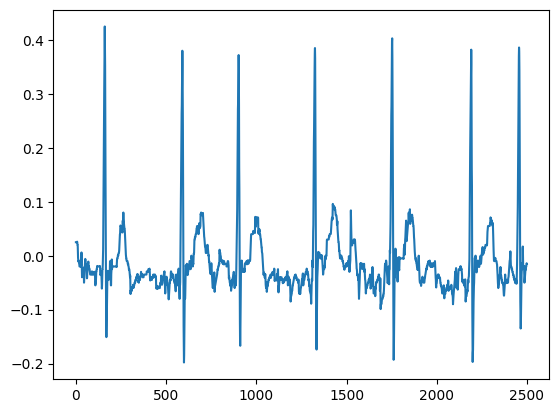

In [18]:
plt.plot(X[FibrillationCase, :2500, 0])
plt.show()



L
[ 0.29   0.29   0.29  ... -0.013 -0.013 -0.021]
(2500,)
[-0.295 -0.295 -0.295 ...  0.025  0.023  0.02 ]
(2500,)
[-0.585 -0.585 -0.585 ...  0.038  0.036  0.041]
(2500,)
[ 0.003  0.003  0.003 ... -0.007 -0.005  0.001]
(2500,)
[ 0.438  0.438  0.438 ... -0.026 -0.025 -0.031]
(2500,)
[-0.44  -0.44  -0.44  ...  0.031  0.029  0.03 ]
(2500,)
[-0.4   -0.4   -0.4   ...  0.035  0.035  0.035]
(2500,)
[-0.675 -0.675 -0.675 ... -0.033 -0.029 -0.03 ]
(2500,)
[-0.48  -0.48  -0.48  ... -0.075 -0.075 -0.075]
(2500,)
[0.015 0.015 0.015 ... 0.    0.    0.   ]
(2500,)
[ 0.265  0.265  0.265 ... -0.145 -0.145 -0.145]
(2500,)
[-0.37  -0.37  -0.37  ...  0.105  0.105  0.105]
(2500,)
L
[ 0.2    0.2    0.2   ...  0.035 -0.022 -0.046]
(2500,)
[-0.27  -0.27  -0.27  ...  0.012  0.01   0.009]
(2500,)
[-0.47  -0.47  -0.47  ... -0.023  0.032  0.055]
(2500,)
[ 0.035  0.035  0.035 ... -0.023  0.005  0.018]
(2500,)
[ 0.335  0.335  0.335 ...  0.029 -0.027 -0.051]
(2500,)
[-0.37  -0.37  -0.37  ... -0.006  0.02   0.032]
(2

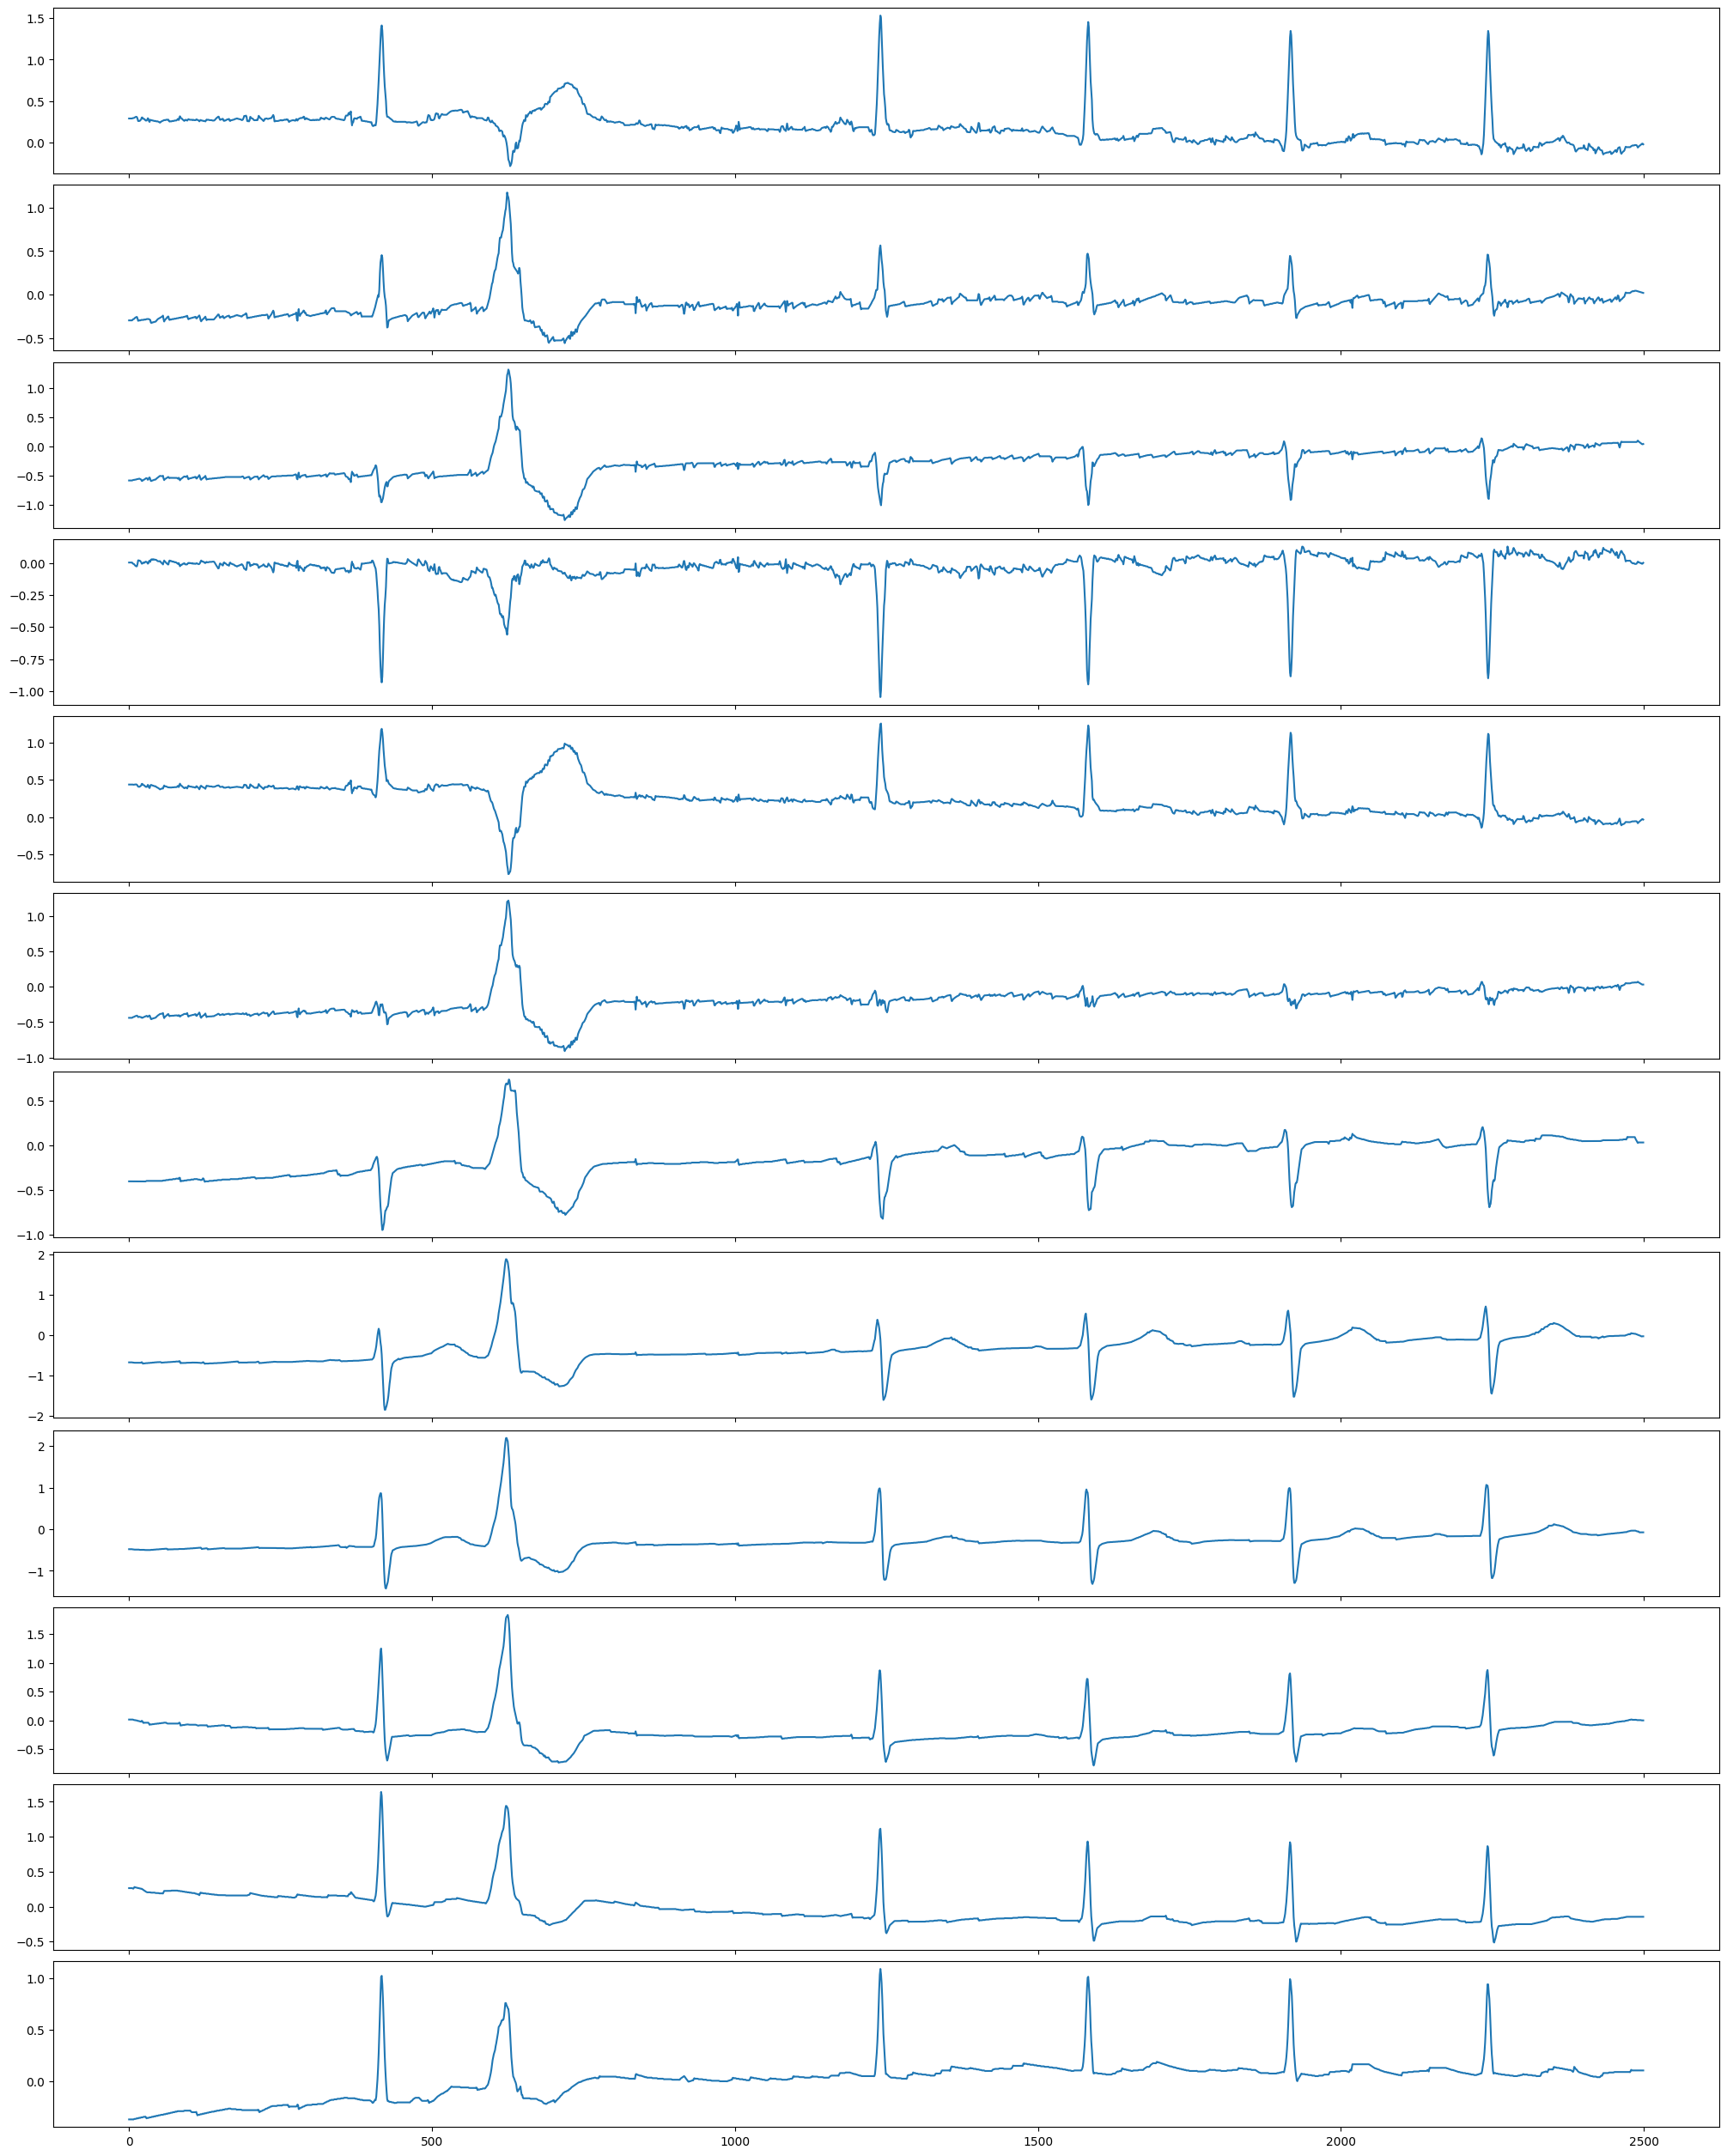

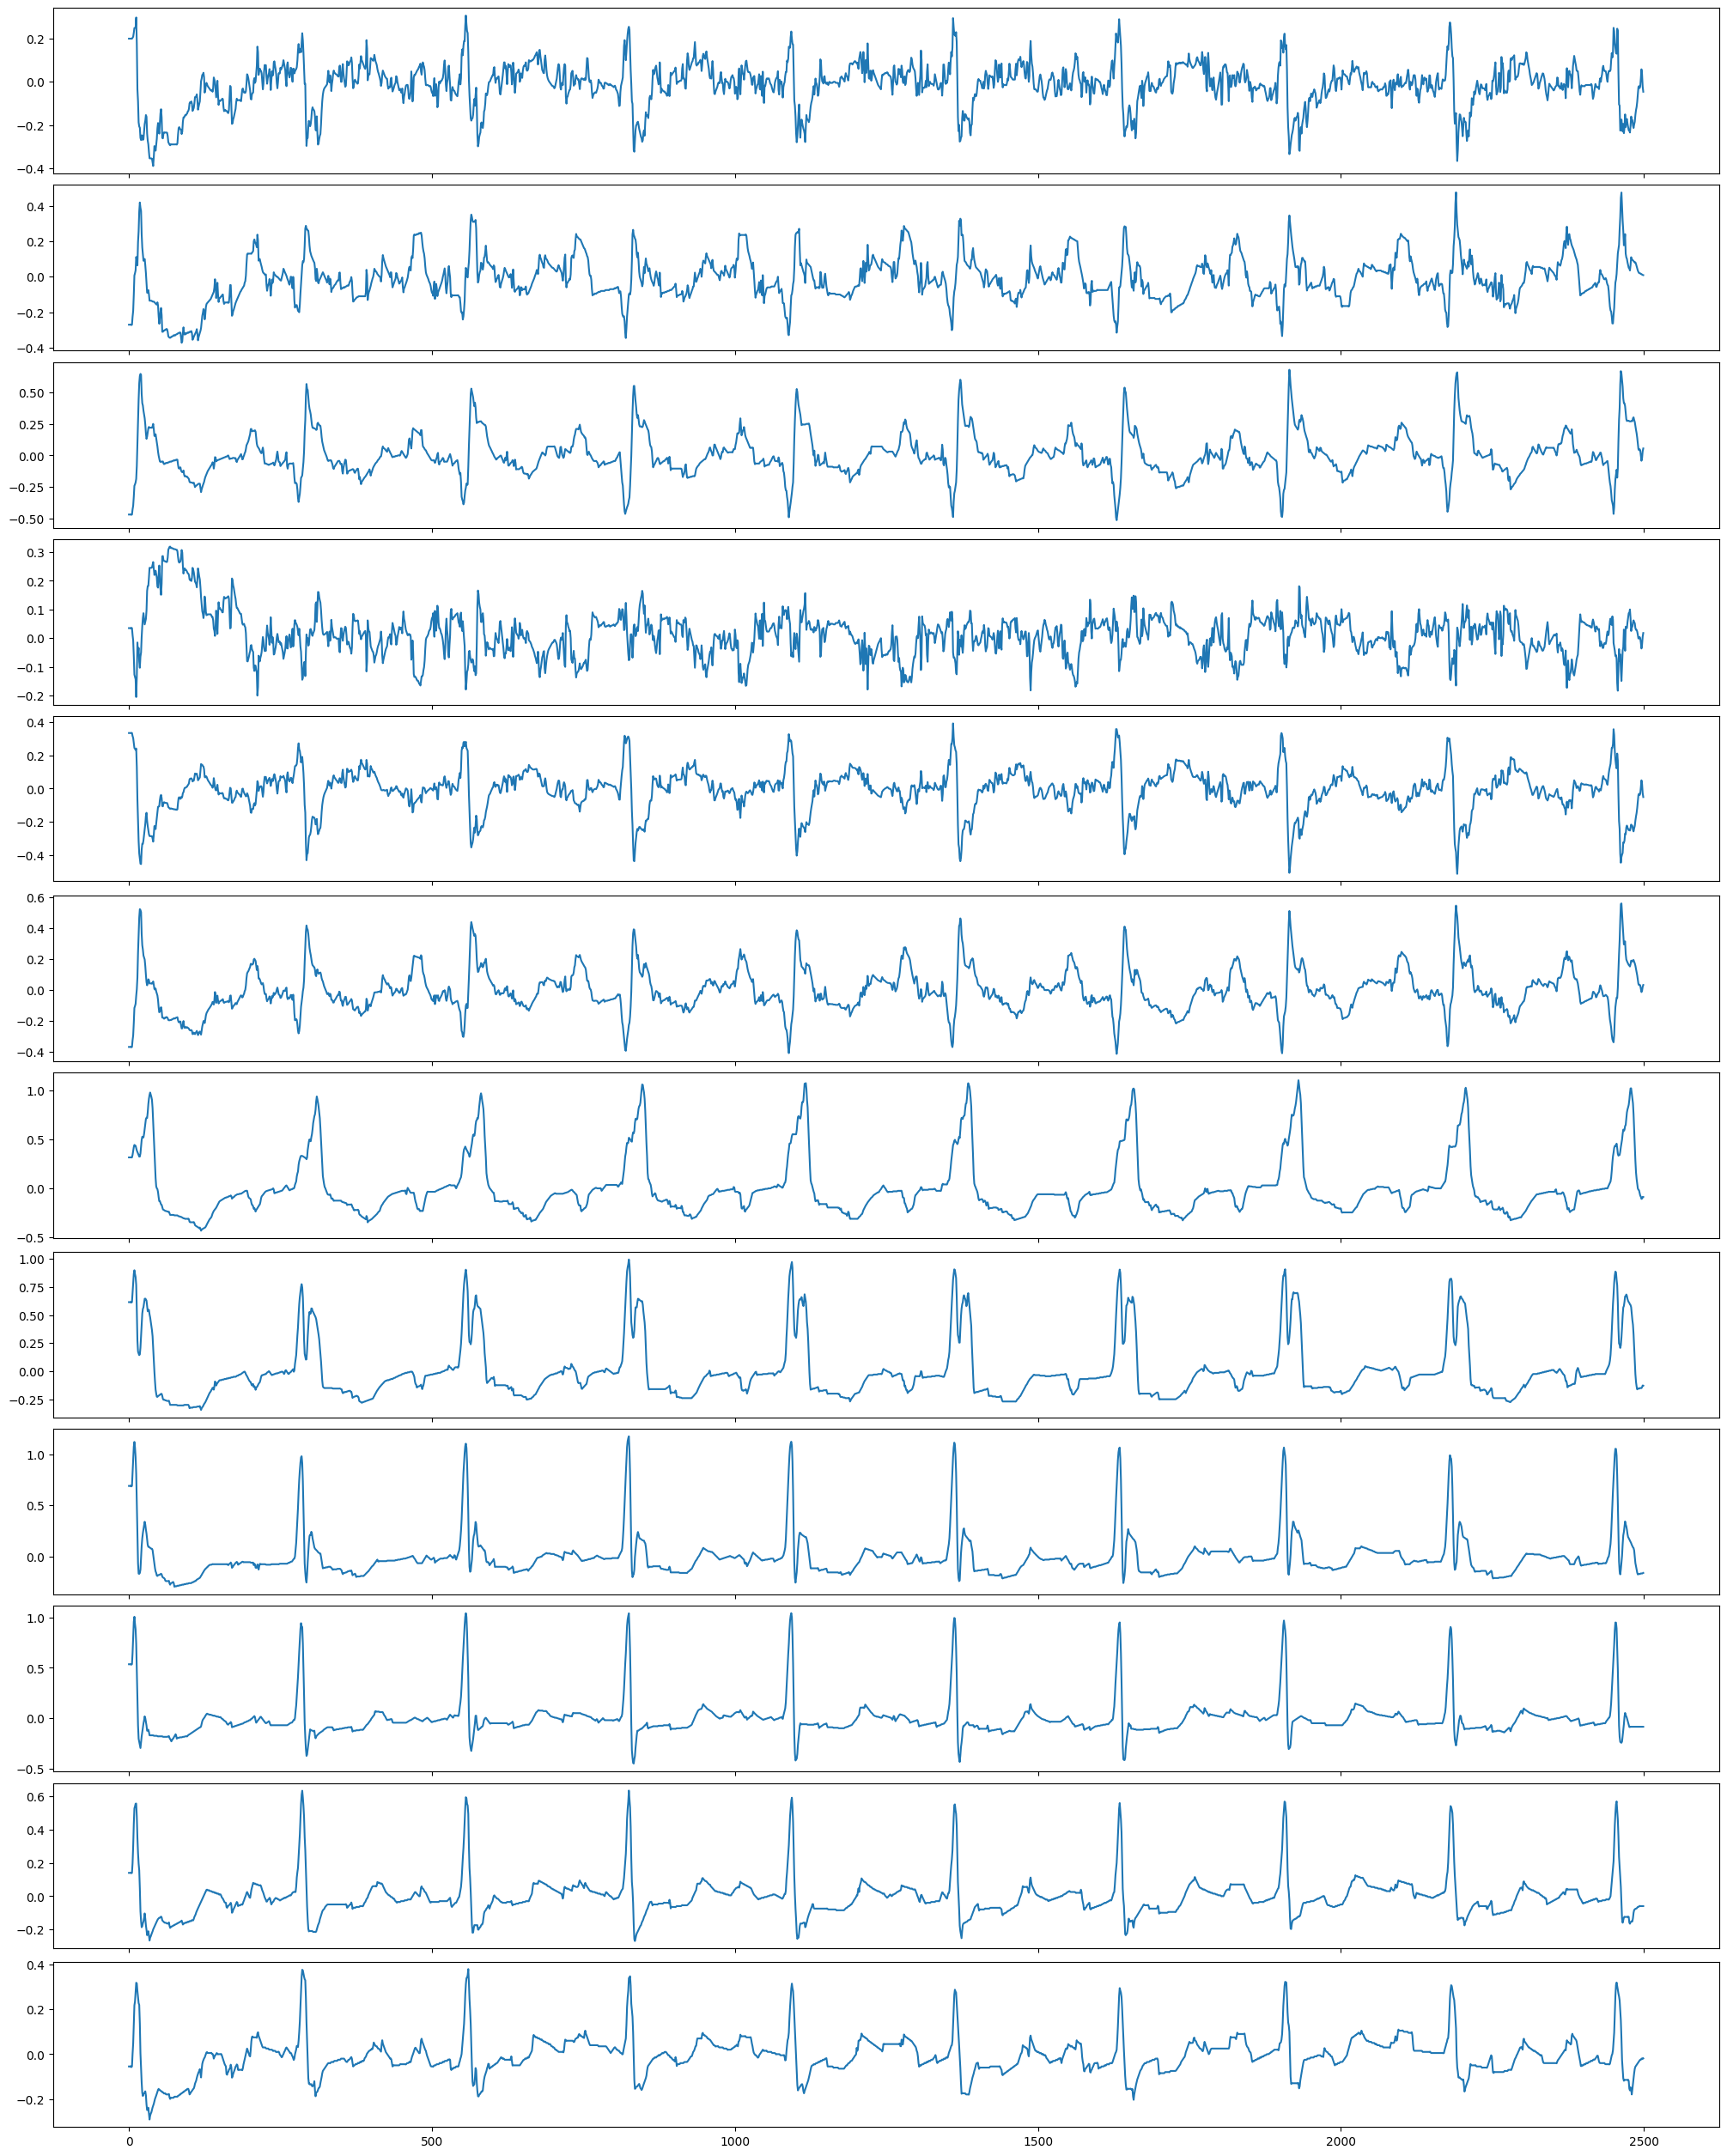

In [21]:
for j in range(2):
    FibCase = random.choice(list(Y[Y['ritmi'] == 'VA'].index))
    print('L')
    fig,ax = plt.subplots(12,1, figsize=(20,25), sharex=True, sharey=False, constrained_layout=True)
    for i in range(12):
        ax[i].plot(X[FibCase, :2500, i])
        print(X[FibCase, :2500, i])
        print(X[FibCase, :2500, i].shape)